In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [2]:
n1 = 10 # cantidad de ciudades
n2 = 3  # cantidad de viajes
n3 = 5  # distancia máxima
a = 0
distance = np.zeros([n1,n1])
moves = np.zeros([n2, 2])

In [3]:
while (np.linalg.matrix_rank(a)!=n1):
    a = np.random.randint(n3, size=(n1,n1))
    np.fill_diagonal(a,0)
    a = np.tril(a) + np.tril(a, -1).T
print("Matriz de rutas: \n{}".format(a))

Matriz de rutas: 
[[0 3 0 3 1 4 0 1 2 3]
 [3 0 4 0 1 1 4 1 3 0]
 [0 4 0 0 1 4 0 4 3 1]
 [3 0 0 0 4 1 2 2 1 2]
 [1 1 1 4 0 2 2 4 1 2]
 [4 1 4 1 2 0 4 0 4 2]
 [0 4 0 2 2 4 0 2 1 0]
 [1 1 4 2 4 0 2 0 1 1]
 [2 3 3 1 1 4 1 1 0 4]
 [3 0 1 2 2 2 0 1 4 0]]


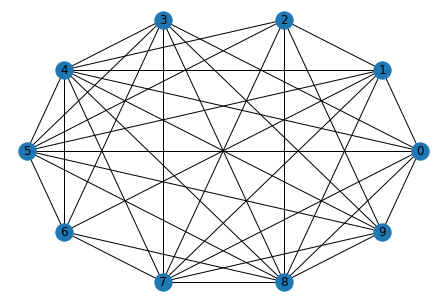

In [4]:
net1 = nx.from_numpy_matrix(copy.deepcopy(a))
net2 = nx.from_numpy_matrix(copy.deepcopy(a))
for e in net1.edges():
    net1[e[0]][e[1]]['color'] = 'black'
    net1[e[0]][e[1]]['weight'] = a[e[0],e[1]]
    net2[e[0]][e[1]]['color'] = 'black'
    net2[e[0]][e[1]]['weight'] = a[e[0],e[1]]
nx.draw_circular(net2, with_labels=True)
plt.show()

In [5]:
rng = np.random.default_rng()
for i in range(n2):
    moves[i,:] = rng.choice(n1, size=2, replace=False)
print("Matriz de movimientos: \n{}".format(moves))

Matriz de movimientos: 
[[7. 0.]
 [2. 1.]
 [3. 7.]]


In [6]:
colores = []
for i in range(n2):
    color = np.base_repr(np.random.choice(16777215), base=16)
    colores.append('#{:0>6}'.format(color))

In [7]:
caminos_total = []
for j in range(n2):
    p = nx.shortest_path(net1,int(moves[j,0]),int(moves[j,1]))
    print("Para llegar desde {} hasta {} hay que hacer el siguiente camino: {}".format(moves[j,0],moves[j,1], p))
    caminos_total.append(np.array(p))
    for i in range(len(p)-1):
        net2[p[i]][p[i+1]]['color'] = colores[j]
        net2[p[i]][p[i+1]]['weight'] = a[p[i], p[i+1]]
        print("La distancia entre {} y {} es: {}".format(p[i], p[i+1], net2[p[i]][p[i+1]]['weight']))
        net1.remove_edge(p[i],p[i+1])

Para llegar desde 7.0 hasta 0.0 hay que hacer el siguiente camino: [7, 0]
La distancia entre 7 y 0 es: 1
Para llegar desde 2.0 hasta 1.0 hay que hacer el siguiente camino: [2, 1]
La distancia entre 2 y 1 es: 4
Para llegar desde 3.0 hasta 7.0 hay que hacer el siguiente camino: [3, 7]
La distancia entre 3 y 7 es: 2


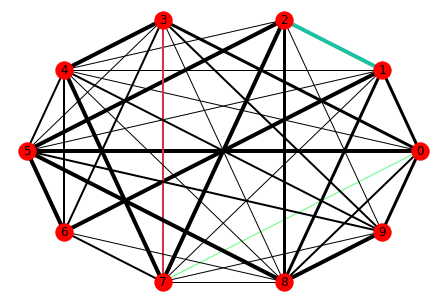

In [8]:
edge_color_list = [net2[e[0]][e[1]]['color'] for e in net2.edges()]
edge_weights_list = [net2[e[0]][e[1]]['weight'] for e in net2.edges()]
nx.draw_circular(net2,node_color='red',edge_color = edge_color_list, with_labels = True, width=edge_weights_list)
plt.show()

In [9]:
caminos_total = np.array(caminos_total)
distancia_total = 0
for i in range(caminos_total.shape[0]):
    for j in range(caminos_total[i].shape[0]-1):
        if (caminos_total[i][j] != caminos_total[i][j+1]):
            distancia_total += net2[caminos_total[i][j]] [caminos_total[i][j+1]]['weight']
print("La distancia total recorrida es:", distancia_total)

La distancia total recorrida es: 7
